In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("student_mat.csv")  


In [6]:
print("\n🔹 Checking for Missing Values:\n", df.isnull().sum())



🔹 Checking for Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
pstatus       0
medu          0
fedu          0
mjob          0
fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
dalc          0
walc          0
health        0
absences      0
g1            0
g2            0
g3            0
dtype: int64


In [7]:
print("\n🔹 Summary Statistics:\n", df.describe())



🔹 Summary Statistics:
               age        medu        fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        dalc        walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std

In [8]:
print("\n🔹 Dataset Shape:", df.shape)



🔹 Dataset Shape: (395, 33)


In [9]:
print("\n🔹 Data Types:\n", df.dtypes)



🔹 Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
pstatus       object
medu           int64
fedu           int64
mjob          object
fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup       bool
famsup          bool
paid            bool
activities      bool
nursery         bool
higher          bool
internet        bool
romantic        bool
famrel         int64
freetime       int64
goout          int64
dalc           int64
walc           int64
health         int64
absences       int64
g1             int64
g2             int64
g3             int64
dtype: object


In [12]:
print(df.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'dalc',
       'walc', 'health', 'absences', 'g1', 'g2', 'g3'],
      dtype='object')


In [14]:
print("\nDataset Info:")
print(df.info())

# 3️⃣ **Handle Categorical Variables** (Convert them to numerical format)
categorical_columns = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian']


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   pstatus     395 non-null    object
 6   medu        395 non-null    int64 
 7   fedu        395 non-null    int64 
 8   mjob        395 non-null    object
 9   fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    bool  
 16  famsup      395 non-null    bool  
 17  paid        395 non-null    bool  
 18  activities  395 non-null    bool  
 19  nursery     395 non-null    bool  


In [15]:
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

In [16]:
print("\nUpdated Categorical Columns (Converted to Numeric):")
print(df.head())


Updated Categorical Columns (Converted to Numeric):
   school  sex  age  address  famsize  pstatus  medu  fedu  mjob  fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  dalc  walc  health  absences  g1  g2  g3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]


In [18]:
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [20]:
df = df[(df['absences'] >= lower_bound) & (df['absences'] <= upper_bound)]


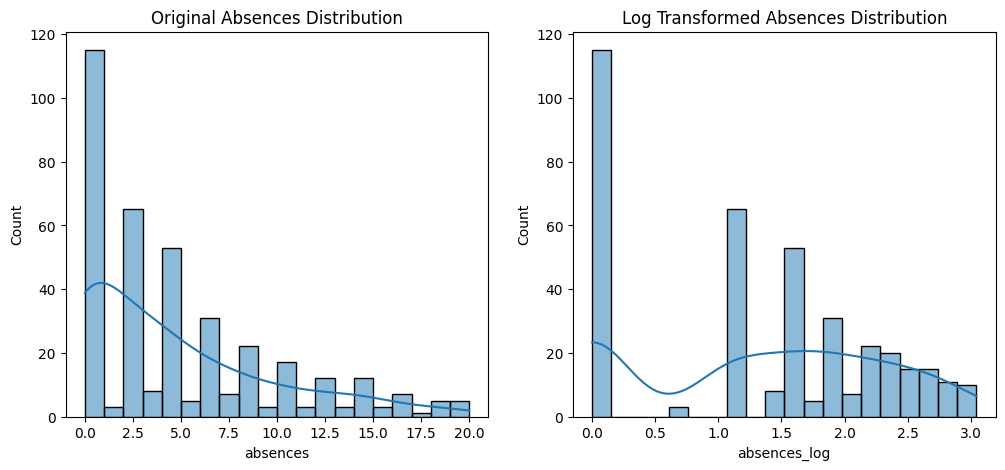

In [26]:
if 'absences' in df.columns:
    df.loc[:, 'absences_log'] = np.log1p(df['absences'])

    # Plot before and after transformation
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.histplot(df['absences'], bins=20, kde=True, ax=ax[0])
    ax[0].set_title("Original Absences Distribution")

    sns.histplot(df['absences_log'], bins=20, kde=True, ax=ax[1])
    ax[1].set_title("Log Transformed Absences Distribution")

    plt.show()